# Visualizations for Neuromappr project
This notebook contains visualizations for the Neuromappr project. This project has EEG data to be used in BCI and other projects. The goal of this project is to create a visualization of the EEG data that can be used to identify patterns in the data.

## EEG Electrode Positions
This section visualizes the positions of EEG electrodes on a 2D plane. The coordinates are scaled to fit a realistic head size.

In [1]:
%pip install mne -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import mne # for EEG data processing
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata # for interpolation
import matplotlib.pyplot as plt # for plotting


In [3]:
df_elec_pos = pd.read_csv('../data/BCIsensor_xy.csv', header=None, names=['x', 'y'])
df_elec_pos.head()

,x,y
0,-41.344,17.1350
1,-33.899,19.9880
2,-38.429,9.1015
3,-45.260,3.4263
4,-32.252,8.0421


In [4]:
# Extract data
x, y, z = df_elec_pos["x"].values, df_elec_pos["y"].values, df_elec_pos.index.values

In [5]:
# Create interpolation grid
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 200),
    np.linspace(y.min(), y.max(), 200)
)
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

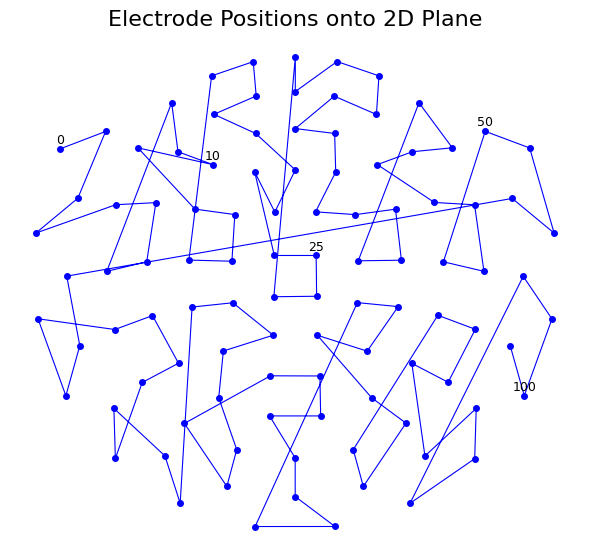

In [6]:
# Start plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Add electrode dots and connect them
ax.plot(x, y, 'bo-', linewidth=0.8, markersize=4)  # dots connected by lines

# label electrodes
for i in [0, 10, 25, 50,100]:
    if i < len(df_elec_pos):
        ax.text(x[i], y[i]+1.5, str(i), fontsize=9, ha='center', va='center', color='black')

# Formatting
ax.set_aspect('equal')
ax.axis('off')
plt.title('Electrode Positions onto 2D Plane', fontsize=16)
fig.savefig('../figures/electrode_positions.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [7]:
scaler = MinMaxScaler(feature_range=(-0.09, 0.09))  # scale to realistic head size in meters
coords_scaled = scaler.fit_transform(df_elec_pos[['x', 'y']].values)

In [8]:
ch_names = [f'Ch{i+1}' for i in range(len(coords_scaled))]
ch_pos = {name: (x, y, 0.0) for name, (x, y) in zip(ch_names, coords_scaled)}

In [9]:
montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame='head')

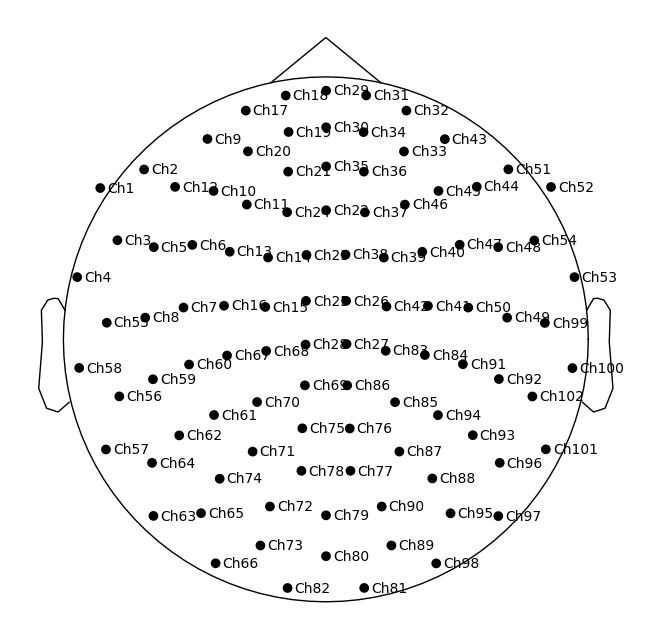

In [10]:
fig = montage.plot(kind='topomap', show_names=True)
# add title to figure
fig.suptitle('EEG Electrode Positions on Topomap', fontsize=16)
fig.savefig('../figures/electrode_positions_topomap.png', dpi=300, bbox_inches='tight')